In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('c6w1.csv', sep=';')
data1.set_index('index', inplace = True)

In [3]:
data1.head

<bound method NDFrame.head of                      1  2  3  4  5  6  7  8  9  10  ...  2491  2492  2493  \
index                                               ...                     
2016-05-01 00:00:00  0  0  0  0  0  0  0  0  0   0  ...     0     0     0   
2016-05-01 01:00:00  0  0  0  0  0  0  0  0  0   0  ...     0     0     0   
2016-05-01 02:00:00  0  0  0  0  0  0  0  0  0   0  ...     0     0     0   
2016-05-01 03:00:00  0  0  0  0  0  0  0  0  0   0  ...     0     0     0   
2016-05-01 04:00:00  0  0  0  0  0  0  0  0  0   0  ...     0     0     0   
...                 .. .. .. .. .. .. .. .. ..  ..  ...   ...   ...   ...   
2016-05-31 19:00:00  0  0  0  0  0  0  0  0  0   0  ...     0     0     0   
2016-05-31 20:00:00  0  0  0  0  0  0  0  0  0   0  ...     0     0     0   
2016-05-31 21:00:00  0  0  0  0  0  0  0  0  0   0  ...     0     0     0   
2016-05-31 22:00:00  0  0  0  0  0  0  0  0  0   0  ...     0     0     0   
2016-05-31 23:00:00  0  0  0  0  0  0  0  0  0

In [4]:
reg= pd.read_csv("regions.csv", delimiter=';')
reg.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


In [5]:
Empire = [-73.985664, 40.748441]

Просуммируйте общее количество поездок такси из каждой географической зоны и посчитайте количество ячеек, из которых в мае не было совершено ни одной поездки.

In [6]:
sum(data1.sum(axis=0) == 0)

1283

Нарисуйте статическую карту Нью-Йорка. Поставьте на карте точку там, где находится Эмпайр-Стейт-Билдинг.

In [7]:
from mpl_toolkits.basemap import Basemap

In [8]:
data1.sum1 = data1.sum(axis=0)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


C:\Users\User\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\User\Anaconda3\lib\site-packages\pyproj\crs\crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))


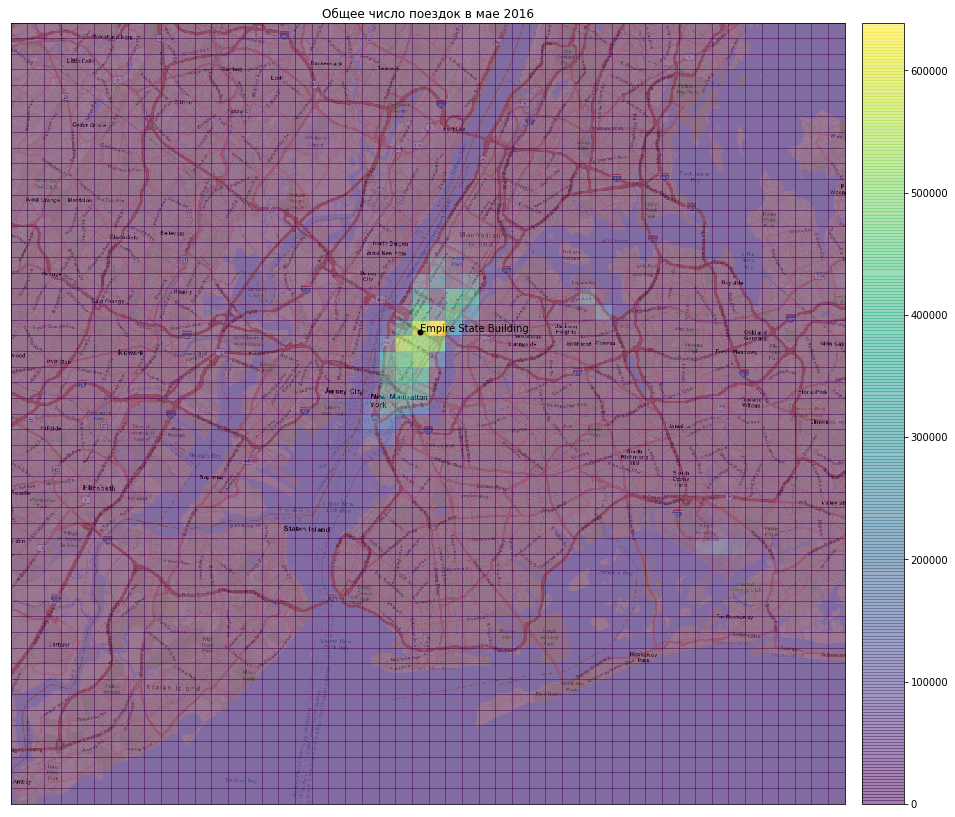

In [9]:
map_basemap = Basemap(llcrnrlat=(reg.south[0]),
                      llcrnrlon=(reg.west[0]), 
                      urcrnrlat=(reg.north[-1:]),
                      urcrnrlon=(reg.east[-1:]), 
                      resolution='f',
                      projection='mill',
                      area_thresh=50000,
                     lat_0=(reg.north[-1:] + reg.south[0])/2.0,
                     lon_0=(reg.west[0] +reg.east[-1:])/2.0,
                      epsg=2805)


fig= plt.figure(figsize=(16,16))
map_basemap.shadedrelief()
map_basemap.bluemarble()
x,y = map_basemap(Empire[0] , Empire[1])
plt.plot(x,y, 'ok', markersize=5)
plt.text(x,y,'Empire State Building', fontsize=10);
map_basemap.arcgisimage(service='World_Street_Map', xpixels=1200, epsg=2805)
# рисуем карту по значениям поездок
x_array = pd.unique(reg.west)

x_array.sort()
y_array = pd.unique(reg.south)

y_array.sort()
x_array = np.append(x_array, reg.east[-1:].values)
y_array = np.append(y_array, reg.north[-1:].values)

d= (np.array(data1.sum1)).reshape(50,50).transpose()

#parallels = np.arange(x_array[0], x_array[-1:], (x_array[-1:] - x_array[0])/10.)
#meridians = np.arange(y_array[0], y_array[-1:], (y_array[-1:] - y_array[0])/10.)
#map_basemap.drawparallels(parallels, labels = [1, 0, 0, 0])
#map_basemap.drawmeridians(meridians, labels = [0, 0, 0, 1])


map_basemap.pcolormesh (x_array, y_array, d, latlon=True, vmin=0, vmax= max(data1.sum1), alpha = 0.5)

cbar = map_basemap.colorbar()



plt.title(u'Общее число поездок в мае 2016')

plt.show()

In [10]:
import folium 
from folium import plugins

Вставьте интерактивную карту Нью-Йорка — такую, которую можно прокручивать и увеличивать. Поставьте метку там, где находится статуя свободы.

In [11]:
Statue = [40.689047, -74.044569]

In [12]:
#Проведем манипуляции над средним из задания
data1_mean1 = pd.DataFrame(data1.mean(axis=0), columns=['Mean'])
data1_mean1['id'] = data1.mean(axis=0).index


In [13]:
#Преобразуем координаты в полигоны
import geojson
from geojson import FeatureCollection
from geojson import Feature
from geojson import Polygon
def getPolygons(regions):
    polygonCollection = []
    for i in range(regions.shape[0]):
#Последовательно обходим ячейку покругу, последняя сторона должна ровняться первоночальной
        polygon = Polygon([[(regions.iloc[i].west,regions.iloc[i].south),
                           (regions.iloc[i].west,regions.iloc[i].north),
                           (regions.iloc[i].east,regions.iloc[i].north),
                           (regions.iloc[i].east,regions.iloc[i].south),
                           #(regions.iloc[i].west,regions.iloc[i].south)
                           ]])
        feature = Feature(geometry=polygon,id=str(regions.index[i]))
        polygonCollection.append(feature)
    return FeatureCollection(polygonCollection)

geo_data = getPolygons(reg)

Нарисуйте на интерактивной карте Нью-Йорка ячейки так, чтобы их цвет показывал среднее за месяц количество поездок такси в час из этой зоны.

In [14]:
map2 = folium.Map(location=[(reg.north[-1:] + reg.south[0])/2, (reg.east[-1:] + reg.west[0])/2], zoom_start=11)
folium.Marker(location= Statue, popup='Statue of Liberty', tooltip='Statue of Liberty').add_to(map2)

folium.Choropleth(
    geo_data=geo_data,
    data=data1_mean1,
    columns=['id', 'Mean'],
    key_on='id',
    fill_color='YlGn',
    fill_opacity=0.5,
    line_opacity=0.1,
    legend_name='Mean',
    highlight=True
).add_to(map2)

# layer control to turn choropleth on or off
folium.LayerControl().add_to(map2)
map2 

In [15]:
data1_mean1 = data1_mean1[data1_mean1['Mean'] >= 5]

In [16]:
#число ячеек, где среднее больше 5
sum(data1_mean1['Mean'] > 5)

102

In [17]:
map3 = folium.Map(location=[(reg.north[-1:] + reg.south[0])/2, (reg.east[-1:] + reg.west[0])/2], zoom_start=11)
folium.Marker(location= Statue, popup='Statue of Liberty', tooltip='Statue of Liberty').add_to(map3)

folium.Choropleth(
    geo_data=geo_data,
    data=data1_mean1,
    columns=['id', 'Mean'],
    key_on='id',
    fill_color='YlGn',
    fill_opacity=0.5,
    line_opacity=0.1,
    legend_name='Mean',
    highlight=True
).add_to(map3)

# layer control to turn choropleth on or off
folium.LayerControl().add_to(map3)
map3 

In [18]:
map3.save('map3_c6w2.html')

In [21]:
data1_mean1.dtypes

Mean    float64
id       object
dtype: object

In [20]:
geo_data

{"features": [{"geometry": {"coordinates": [[[-74.25559, 40.49612], [-74.25559, 40.504508], [-74.244478, 40.504508], [-74.244478, 40.49612]]], "type": "Polygon"}, "id": "0", "properties": {}, "type": "Feature"}, {"geometry": {"coordinates": [[[-74.25559, 40.504508], [-74.25559, 40.512896], [-74.244478, 40.512896], [-74.244478, 40.504508]]], "type": "Polygon"}, "id": "1", "properties": {}, "type": "Feature"}, {"geometry": {"coordinates": [[[-74.25559, 40.512896], [-74.25559, 40.521285], [-74.244478, 40.521285], [-74.244478, 40.512896]]], "type": "Polygon"}, "id": "2", "properties": {}, "type": "Feature"}, {"geometry": {"coordinates": [[[-74.25559, 40.521285], [-74.25559, 40.529673], [-74.244478, 40.529673], [-74.244478, 40.521285]]], "type": "Polygon"}, "id": "3", "properties": {}, "type": "Feature"}, {"geometry": {"coordinates": [[[-74.25559, 40.529673], [-74.25559, 40.538061], [-74.244478, 40.538061], [-74.244478, 40.529673]]], "type": "Polygon"}, "id": "4", "properties": {}, "type": 